In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [78]:
df = pd.read_csv("~/Downloads/Qualitative_Bankruptcy.data.txt", sep=",")
df

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB
...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,B
245,P,N,N,N,N,N,B
246,A,N,N,N,N,N,B
247,N,N,N,N,N,N,B


In [79]:
newdf= df.rename(columns={"P": "industrial Risk", "P.1": "management Risk", "A": "financial Flexibity", "A.1": "credibility", "A.2": "competitiveness", "P.2": "operating Risk", "NB": "Class"})
newdf

,industrial Risk,management Risk,financial Flexibity,credibility,competitiveness,operating Risk,Class
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB
...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,B
245,P,N,N,N,N,N,B
246,A,N,N,N,N,N,B
247,N,N,N,N,N,N,B


In [81]:
lst = []
for change in range(len(newdf['Class'])):
    if newdf['Class'][change] == 'NB':
        lst.append("No Bankruptcy")
    else: 
        newdf['Class'][change] == 'B'
        lst.append('Bankruptcy')
    
newdf['Class'] = lst

In [82]:
newdf

,industrial Risk,management Risk,financial Flexibity,credibility,competitiveness,operating Risk,Class
0,N,N,A,A,A,N,No Bankruptcy
1,A,A,A,A,A,A,No Bankruptcy
2,P,P,P,P,P,P,No Bankruptcy
3,N,N,P,P,P,N,No Bankruptcy
4,A,A,P,P,P,A,No Bankruptcy
...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,Bankruptcy
245,P,N,N,N,N,N,Bankruptcy
246,A,N,N,N,N,N,Bankruptcy
247,N,N,N,N,N,N,Bankruptcy


In [83]:
converting = OrdinalEncoder()
df = newdf[['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk']] = converting.fit_transform(newdf[['industrial Risk', 'management Risk', 'financial Flexibity', 'credibility', 'competitiveness', 'operating Risk']])
newdf

,industrial Risk,management Risk,financial Flexibity,credibility,competitiveness,operating Risk,Class,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,N,N,A,A,A,N,No Bankruptcy,1.0,1.0,0.0,0.0,0.0,1.0
1,A,A,A,A,A,A,No Bankruptcy,0.0,0.0,0.0,0.0,0.0,0.0
2,P,P,P,P,P,P,No Bankruptcy,2.0,2.0,2.0,2.0,2.0,2.0
3,N,N,P,P,P,N,No Bankruptcy,1.0,1.0,2.0,2.0,2.0,1.0
4,A,A,P,P,P,A,No Bankruptcy,0.0,0.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,Bankruptcy,1.0,1.0,0.0,1.0,1.0,1.0
245,P,N,N,N,N,N,Bankruptcy,2.0,1.0,1.0,1.0,1.0,1.0
246,A,N,N,N,N,N,Bankruptcy,0.0,1.0,1.0,1.0,1.0,1.0
247,N,N,N,N,N,N,Bankruptcy,1.0,1.0,1.0,1.0,1.0,1.0


In [87]:
new= newdf.drop(columns={'industrial Risk', 'management Risk', 'financial Flexibity', 'credibility', 'competitiveness', 'operating Risk'})

In [88]:
new

,Class,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,No Bankruptcy,1.0,1.0,0.0,0.0,0.0,1.0
1,No Bankruptcy,0.0,0.0,0.0,0.0,0.0,0.0
2,No Bankruptcy,2.0,2.0,2.0,2.0,2.0,2.0
3,No Bankruptcy,1.0,1.0,2.0,2.0,2.0,1.0
4,No Bankruptcy,0.0,0.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...
244,Bankruptcy,1.0,1.0,0.0,1.0,1.0,1.0
245,Bankruptcy,2.0,1.0,1.0,1.0,1.0,1.0
246,Bankruptcy,0.0,1.0,1.0,1.0,1.0,1.0
247,Bankruptcy,1.0,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'Graph showing the Relationship between Industrial Risk and Class')

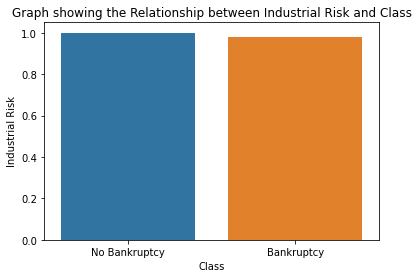

In [95]:
sns.barplot(y='Industrial Risk', x='Class', ci=None, data=new)
plt.title(" The Graph is showing the Relationship between Industrial Risk and Class")

Text(0.5, 1.0, 'The Graph is showing the Relationship between Managemnet Risk and Class')

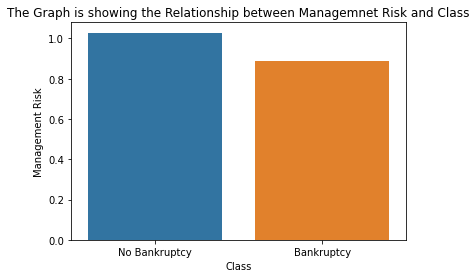

In [96]:
sns.barplot(y='Management Risk', x='Class', ci=None, data = new)
plt.title("The Graph is showing the Relationship between Managemnet Risk and Class")

Text(0.5, 1.0, 'The Graph is showing the Relationship between Financial Flexibility and Class')

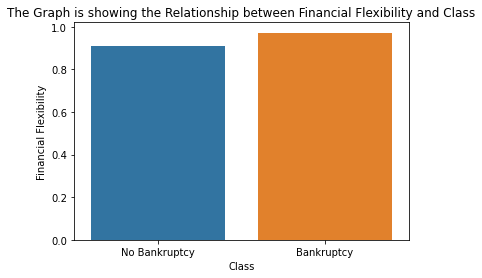

In [100]:
sns.barplot(y='Financial Flexibility', x="Class", ci=None, data=new)
plt.title("The Graph is showing the Relationship between Financial Flexibility and Class")

Text(0.5, 1.0, 'The Graph is showing the Relationship between Credibility and Class')

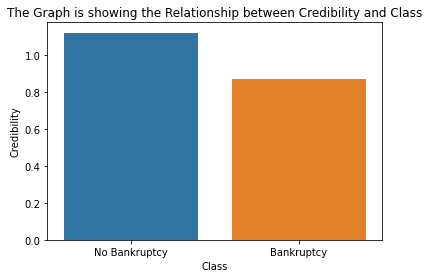

In [101]:
sns.barplot(y='Credibility', x="Class", ci=None, data=new)
plt.title("The Graph is showing the Relationship between Credibility and Class")

Text(0.5, 1.0, 'The Graph is showing the Relationship between Competitiveness and Class')

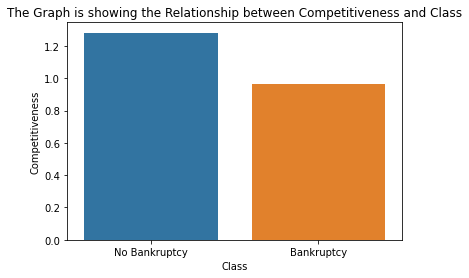

In [102]:
sns.barplot(y='Competitiveness', x="Class", ci=None, data=new)
plt.title("The Graph is showing the Relationship between Competitiveness and Class")

Text(0.5, 1.0, 'The Graph is showing the Relationship between Operating Risk and Class')

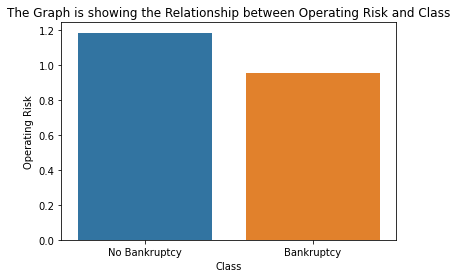

In [103]:
sns.barplot(y='Operating Risk', x="Class", ci=None, data=new)
plt.title("The Graph is showing the Relationship between Operating Risk and Class")

<AxesSubplot:>

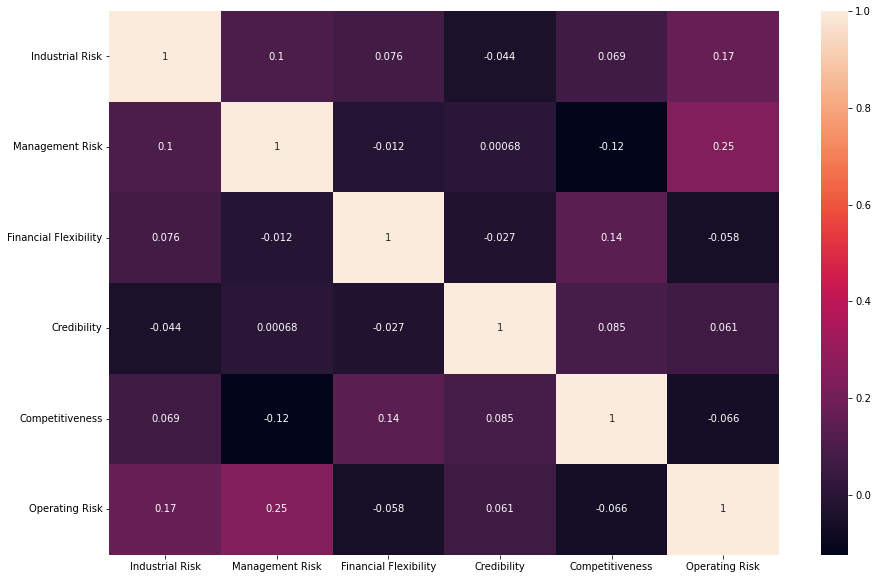

In [114]:
plt.figure(figsize=(15, 10))
sns.heatmap(new.corr(), annot=True)

In [122]:
y=new["Class"]
X=new.drop(columns={"Class"})
y.value_counts()

No Bankruptcy    142
Bankruptcy       107
Name: Class, dtype: int64

In [126]:
sample = SMOTE(random_state = 45)
X, y = sample.fit_resample(X, y)
y.value_counts()

No Bankruptcy    142
Bankruptcy       142
Name: Class, dtype: int64

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45, test_size = 0.20, train_size = 0.80)

In [137]:
pca = PCA(n_components= 6)
model = pca.fit(X_train)
PCA(n_components= 6)
print(model.explained_variance_ratio_)  

[0.24437819 0.18937282 0.17592318 0.14693236 0.13003348 0.11335997]


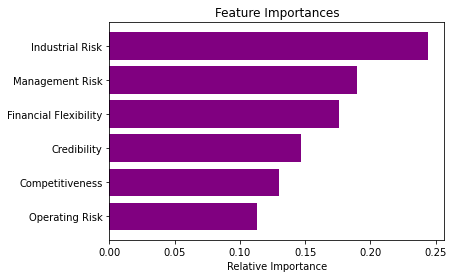

In [139]:
features = X.columns
importances = model.explained_variance_ratio_
indices = np.argsort(importances)[-7:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Text(0.5, 1.0, 'Elbow curve')

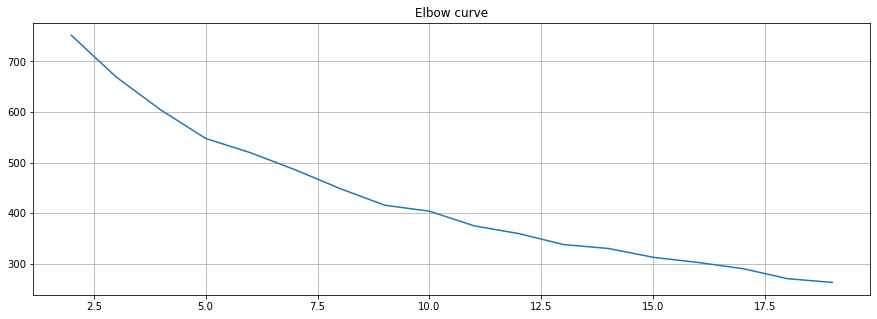

In [141]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

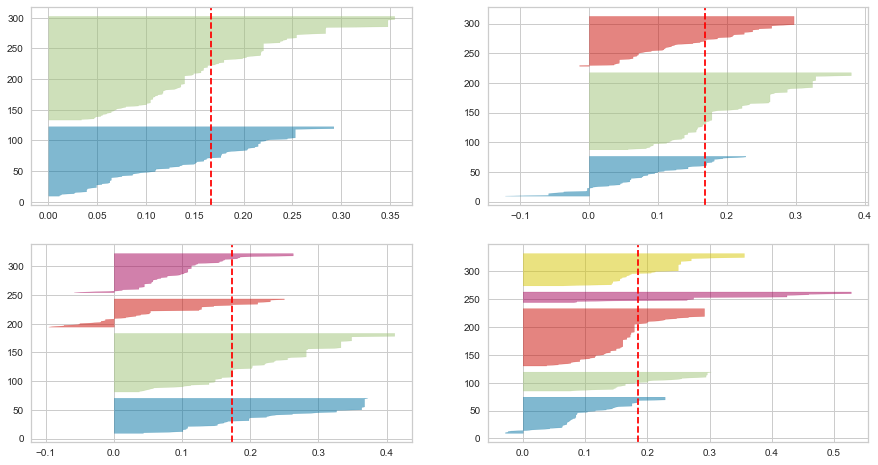

In [144]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=45)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [149]:
model = KNeighborsClassifier(n_neighbors = 5)
mod = model.fit(X_train, y_train)

In [150]:
mode = mod.score(X_train, y_train)
mode

0.9647577092511013

In [154]:
y_predict = mod.predict(X_test)

In [155]:
confusion_matrix(y_test, y_predict)

array([[26,  0],
       [ 6, 25]])

In [157]:
print(classification_report(y_test, y_predict))

               precision    recall  f1-score   support

   Bankruptcy       0.81      1.00      0.90        26
No Bankruptcy       1.00      0.81      0.89        31

     accuracy                           0.89        57
    macro avg       0.91      0.90      0.89        57
 weighted avg       0.91      0.89      0.89        57

